<a href="https://colab.research.google.com/github/santipop1/AdvancedIA/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import polars as pl
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [18]:
airbnb = pl.read_csv('/content/listings.csv')

In [19]:
airbnb.count()

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
26067,26067,26067,26067,26067,26067,25300,14391,26067,26067,26067,26062,26062,20587,26062,26062,26062,26062,24724,26062,26062,13875,26062,26062,26067,26062,26062,14391,26067,0,26067,26067,26067,26067,26067,22062,26040,…,26067,26067,26067,26067,26067,26067,26067,0,25076,26067,26067,26067,26067,26067,26067,26067,26067,26067,26067,26067,22068,22806,22806,22806,22805,22805,22805,22805,22805,22805,0,26067,26067,26067,26067,26067,22806


In [20]:
airbnb.describe()

statistic,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
str,f64,str,f64,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str,str,f64,f64,str,str,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64
"""count""",26067.0,"""26067""",26067.0,"""26067""","""26067""","""26067""","""25300""","""14391""","""26067""",26067.0,"""26067""","""26062""","""26062""","""20587""","""26062""","""26062""","""26062""","""26062""","""24724""","""26062""","""26062""","""13875""",26062.0,26062.0,"""26067""","""26062""","""26062""","""14391""","""26067""","""0""",26067.0,26067.0,"""26067""","""26067""",26067.0,22062.0,…,26067.0,26067.0,26067.0,26067.0,26067.0,26067.0,26067.0,"""0""","""25076""",26067.0,26067.0,26067.0,26067.0,"""26067""",26067.0,26067.0,26067.0,26067.0,26067.0,26067.0,22068.0,"""22806""","""22806""",22806.0,22805.0,22805.0,22805.0,22805.0,22805.0,22805.0,"""0""","""26067""",26067.0,26067.0,26067.0,26067.0,22806.0
"""null_count""",0.0,"""0""",0.0,"""0""","""0""","""0""","""767""","""11676""","""0""",0.0,"""0""","""5""","""5""","""5480""","""5""","""5""","""5""","""5""","""1343""","""5""","""5""","""12192""",5.0,5.0,"""0""","""5""","""5""","""11676""","""0""","""26067""",0.0,0.0,"""0""","""0""",0.0,4005.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""26067""","""991""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,3999.0,"""3261""","""3261""",3261.0,3262.0,3262.0,3262.0,3262.0,3262.0,3262.0,"""26067""","""0""",0.0,0.0,0.0,0.0,3261.0
"""mean""",6.0413e17,null,2.0250e13,null,null,null,null,null,null,2.2885e8,null,null,null,null,null,null,null,null,null,null,null,null,25.900852,35.072826,null,null,null,null,null,null,19.405242,-99.166046,null,null,3.34676,1.451432,…,497.850424,4.326275,4.861396,83078.227414,83105.265585,4.553466,83091.158453,null,null,12.807151,32.647869,54.661564,218.320865,null,50.484751,15.173246,1.221046,178.373231,14.514482,82.529098,137057.075856,null,null,4.750332,4.783535,4.753931,4.837276,4.823005,4.840322,4.713932,null,null,15.491886,12.622626,2.690068,0.141904,1.803389
"""std""",5.2659e17,null,0.0,null,null,null,null,null,null,1.9542e8,null,null,null,null,null,null,null,null,null,null,null,null,86.765206,123.984298,null,null,null,null,null,null,0.042514,0.033489,null,null,2.359036,1.030367,…,409.415054,24.438706,24.862708,1.3301e7,1.3301e7,24.536108,1.3301e7,null,null,10.623744,21.202736,31.571305,130.073992,null,79.867601,22.005051,1.922822,102.101943,21.68007,89.755021,281565.332008,null,null,0.381077,0.372396,0.378514,0.326791,0.360575,0.29821,0.394899,null,null,36.230505,35.795452,7

In [21]:
airbnb.head()

id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,…,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
i64,str,i64,str,str,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,f64,f64,str,str,i64,f64,str,…,i64,i64,i64,i64,i64,f64,f64,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,str,str,f64,f64,f64,f64,f64,f64,f64,str,str,i64,i64,i64,i64,f64
35797,"""https://www.airbnb.com/rooms/3…",20250319150644,"""2025-03-21""","""city scrape""","""Villa Dante""","""Dentro de Villa un estudio de …","""Santa Fe Shopping Mall, Interl…","""https://a0.muscache.com/pictur…",153786,"""https://www.airbnb.com/users/s…","""Dici""","""2010-06-28""","""Mexico City, Mexico""","""Master in visual arts, film ph…","""N/A""","""N/A""","""N/A""","""f""","""https://a0.muscache.com/im/pic…","""https://a0.muscache.com/im/pic…",null,1,1,"""['email', 'phone', 'work_email…","""t""","""t""","""Mexico City, D.f., Mexico""","""Cuajimalpa de Morelos""",null,19.38283,-99.27178,"""Entire villa""","""Entire home/apt""",2,1.0,"""1 bath""",…,7,1,1,7,7,1.0,7.0,null,"""t""",28,58,88,363,"""2025-03-21""",0,0,0,284,0,0,0,null,null,null,null,null,null,null,null,null,null,"""f""",1,1,0,0,null
44616,"""https://www.airbnb.com/rooms/4…",20250319150644,"""2025-03-20""","""previous scrape""","""Condesa Haus""","""A new concept of hosting in me…",null,"""https://a0.muscache.com/pictur…",196253,"""https://www.airbnb.com/users/s…","""Fernando""","""2010-08-09""","""Mexico City, Mexico""","""Condesa Haus Rentals offers i…","""within a few hours""","""100%""","""90%""","""f""","""https://a0.muscache.com/im/use…","""https://a0.muscache.com/im/use…","""Condesa""",13,13,"""['email', 'phone', 'work_email…","""t""","""t""",null,"""Cuauhtémoc""",null,19.41162,-99.17794,"""Entire home""","""Entire home/apt""",14,null,"""5.5 baths""",…,365,1,1,365,365,1.0,365.0,null,"""t""",29,59,89,364,"""2025-03-20""",65,1,0,286,0,6,null,"""2011-11-09""","""2025-01-01""",4.59,4.56,4.7,4.87,4.78,4.98,4.47,null,"""f""",9,4,2,0,0.4
56074,"""https://www.airbnb.com/rooms/5…",20250319150644,"""2025-03-20""","""city scrape""","""Great space in historical San …","""This great apartment is locate…","""Very traditional neighborhood …","""https://a0.muscache.com/pictur…",265650,"""https://www.airbnb.com/users/s…","""Maris""","""2010-10-19""","""Mexico City, Mexico""","""I am a University Professor no…","""within a day""","""88%""","""100%""","""f""","""https://a0.muscache.com/im/use…","""https://a0.muscache.com/im/use…","""San Rafael""",1,5,"""['email', 'phone']""","""t""","""t""","""Mexico City, DF, Mexico""","""Cuauhtémoc""",null,19.43977,-99.15605,"""Entire condo""","""Entire home/apt""",2,1.0,"""1 bath""",…,250,15,15,25

In [22]:
airbnb["room_type"].head()

room_type
str
"""Entire home/apt"""
"""Entire home/apt"""
"""Entire home/apt"""
"""Entire home/apt"""
"""Entire home/apt"""
"""Private room"""
"""Entire home/apt"""
"""Private room"""
"""Entire home/apt"""


In [23]:
clean_price_airbnb = airbnb.with_columns(
    pl.col("price")
    .str.replace_all(r"[$,]", "") # Quitamos signos de pesos y comas
    .cast(pl.Float64) # Cast to float
    .cast(pl.Int64) # Cast to integer
    .alias("price_cleaned")
)

# Display the first few rows of the new dataframe with the cleaned price column
display(clean_price_airbnb.select(["price", "price_cleaned"]).head())

price,price_cleaned
str,i64
"""$3,982.00""",3982
null,null
"""$585.00""",585
null,null
"""$1,015.00""",1015


In [24]:
# media de precios

clean_price_airbnb["price_cleaned"].mean()

1665.005981511691

In [25]:
# roomtypes mas comunes
top_hosts = airbnb.group_by("room_type").agg(pl.count().alias("count")).sort("count", descending=True)
top_hosts.head()

/tmp/ipython-input-2806584021.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  top_hosts = airbnb.group_by("room_type").agg(pl.count().alias("count")).sort("count", descending=True)


room_type,count
str,u32
"""Entire home/apt""",17163
"""Private room""",8646
"""Shared room""",170
"""Hotel room""",88


In [26]:
#10 alcaldias con mas alojamientos
top_alcaldias = airbnb.group_by("neighbourhood_cleansed").agg(pl.count().alias("count")).sort("count", descending=True)
top_alcaldias.head(10)

/tmp/ipython-input-3070367578.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  top_alcaldias = airbnb.group_by("neighbourhood_cleansed").agg(pl.count().alias("count")).sort("count", descending=True)


neighbourhood_cleansed,count
str,u32
"""Cuauhtémoc""",12030
"""Miguel Hidalgo""",4441
"""Benito Juárez""",2989
"""Coyoacán""",1693
"""Álvaro Obregón""",1007
"""Venustiano Carranza""",838
"""Tlalpan""",777
"""Gustavo A. Madero""",479
"""Cuajimalpa de Morelos""",424


In [27]:
# 10 personas con mas alojamientos
top_alojamientos = airbnb.group_by("host_name").agg(pl.count().alias("count")).sort("count", descending=True)
top_alojamientos.head(10)

/tmp/ipython-input-1487880669.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  top_alojamientos = airbnb.group_by("host_name").agg(pl.count().alias("count")).sort("count", descending=True)


host_name,count
str,u32
"""Alejandra""",334
"""Alejandro""",291
"""Raul""",266
"""Juan""",266
"""Luis""",242
"""Blueground""",242
"""Mr. W""",217
"""Carlos""",215
"""Jorge""",212


/tmp/ipython-input-2016590632.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(clean_price_airbnb, x="price_cleaned", kde=True, bins=30, multiple="stack",


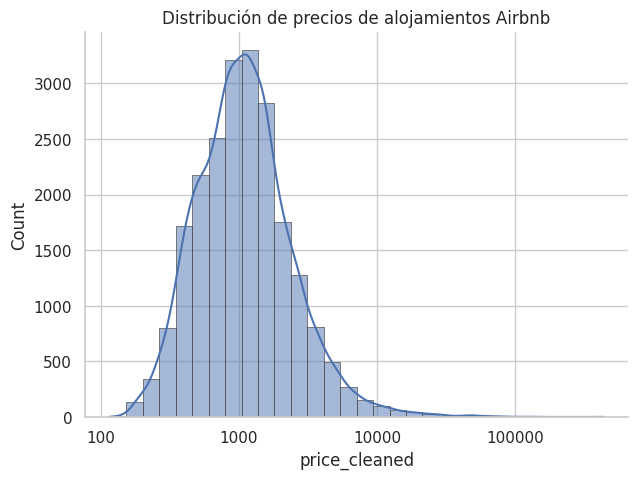

In [32]:
#histograma de distribucion de precios

f, ax = plt.subplots(figsize=(7, 5))
sns.set_theme(style="whitegrid", context="notebook") # Improved style
sns.despine(f)



sns.histplot(clean_price_airbnb, x="price_cleaned", kde=True, bins=30, multiple="stack",
    palette="viridis",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,)


ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

plt.title('Distribución de precios de alojamientos Airbnb')
plt.show()

/tmp/ipython-input-3124679185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hosts, x="room_type", y="count", palette="viridis") # Changed palette


Text(0.5, 1.0, 'Tipos de cuartos más comunes en Airbnb')

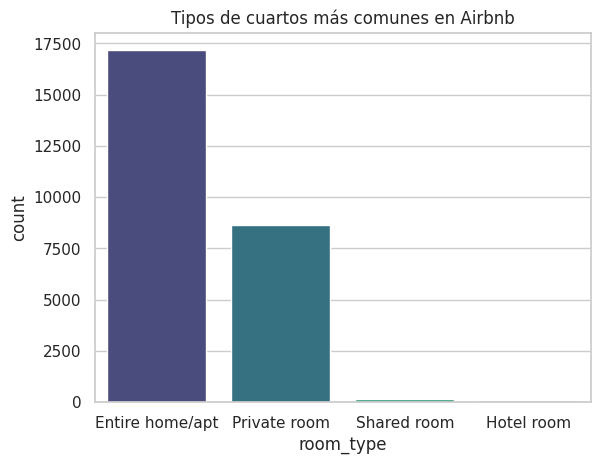

In [34]:
# gráfica de barras de los tipos de cuartos
sns.set_theme(style="whitegrid", context="notebook") # Improved style
sns.barplot(data=top_hosts, x="room_type", y="count", palette="viridis") # Changed palette

plt.title('Tipos de cuartos más comunes en Airbnb')

<Axes: xlabel='host_name', ylabel='count'>

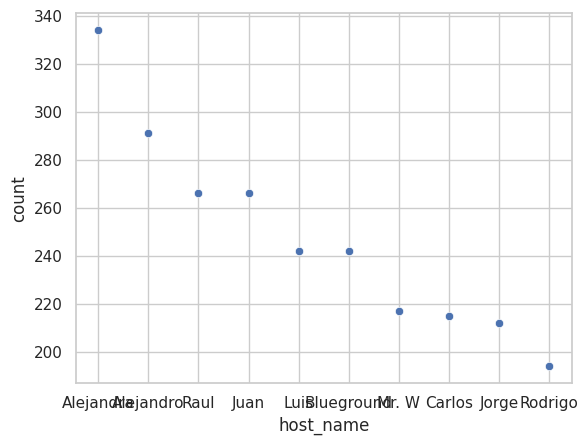

In [30]:
sns.set_theme(style="whitegrid", context="notebook") # Improved style
sns.scatterplot(top_alojamientos.head(10), x="host_name", y="count")

/tmp/ipython-input-86206231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_alcaldias.head(10), y="neighbourhood_cleansed", x="count", palette="viridis") # Changed palette


Text(0.5, 1.0, 'Alcaldías con más alojamientos Airbnb')

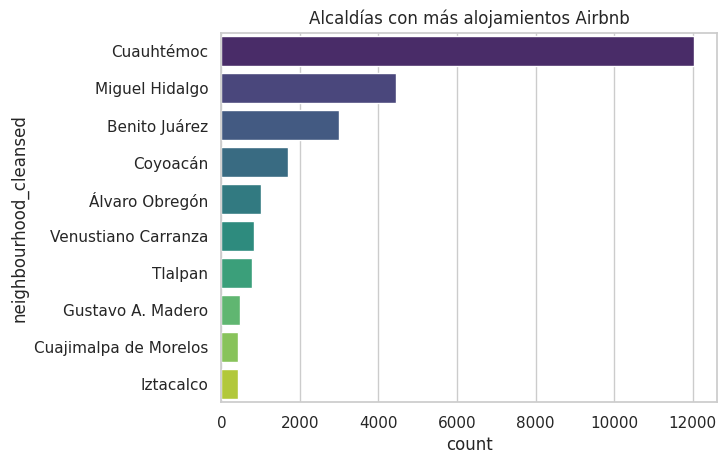

In [35]:
sns.set_theme(style="whitegrid", context="notebook") # Improved style
sns.barplot(data=top_alcaldias.head(10), y="neighbourhood_cleansed", x="count", palette="viridis") # Changed palette

plt.title('Alcaldías con más alojamientos Airbnb')

In [42]:
import pandas as pd
import plotly.express as px

df_plot = clean_price_airbnb.to_pandas()


# Nos quedamos con columnas necesarias y aseguramos tipo numérico
cols = ["latitude", "longitude", "price_cleaned"]
df_plot = df_plot[cols].copy()
for c in cols:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")


df_plot = df_plot.dropna(subset=["latitude", "longitude", "price_cleaned"])
assert len(df_plot) > 0, "No hay filas válidas para graficar."

center_lat = df_plot["latitude"].mean()
center_lon = df_plot["longitude"].mean()

fig = px.scatter_mapbox(
    df_plot,
    lat="latitude",
    lon="longitude",
    color="price_cleaned",     # color por precio
    size="price_cleaned",      # tamaño por precio
    hover_data=["price_cleaned"],
    color_continuous_scale="Viridis",
    size_max=15,
    zoom=10,
    mapbox_style="open-street-map",
    title="Distribución geográfica de precios (Airbnb)"
)
fig.update_layout(mapbox_center={"lat": center_lat, "lon": center_lon})
fig.show()


# Predicción del precio de un airbnb

+ scikit learn
+ TensorFlow